# Getting Started with OpenAI Gym: The Baic Building Blocks
Based on [this article](https://blog.paperspace.com/getting-started-with-openai-gym/) but modified to match current version of Gym.

## Environments

The fundamental building block of OpenAI Gym is the `Env` class. It is a Python class that basically implements a simulator that runs the environment we want to train our agent in.

In [2]:
import gym

env = gym.make('MountainCar-v0', new_step_api=True, render_mode="single_rgb_array")

In [3]:
# Observation and action space
obs_space = env.observation_space  # structure and legitimate values for observation of environment's state
act_space = env.action_space       # numerical structure of legitimate actions that can be applied to environment
print("Obervation space:", obs_space)  # velocity and position vectors
print("Action space:", act_space)

Obervation space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


## Interacting with the Environment

In this section, we cover functions of the Env class that help the agent interact with the environment. Two such important functions are `reset()` and `step()`.

In [4]:
import matplotlib.pyplot as plt

# Reset env and see initial observation
obs = env.reset()
print("Initial observation:", obs)

# Sample random action from entire action space
rand_act = act_space.sample()

# Take action and get new obs space
new_obs, reward, terminated, truncated, info = env.step(rand_act)
print("New observation:", new_obs)

Initial observation: [-0.35628894  0.        ]
New observation: [-3.5649174e-01 -2.0279488e-04]


In [5]:
env_screen = env.render()
env.close()

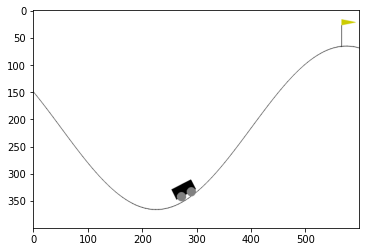

In [6]:
plt.imshow(env_screen)

To see the animated environment, run `.\mountain_car.py`

## Spaces

The `observation_space` for our environment was `Box(..., (2,), ...)`, and the `action_space` was `Discrete(3)`. Both `Box` and `Discrete` are types of data structures called "Spaces" provided by Gym to describe the legitimate values for the observations and actions for the environments.

In [7]:
print(type(obs_space))

print("Env observation upper bound", obs_space.high)
print("Env observation lower bound", obs_space.low)

<class 'gym.spaces.box.Box'>
Env observation upper bound [0.6  0.07]
Env observation lower bound [-1.2  -0.07]


In [8]:
print(type(act_space))

print(f"Env action space n = {act_space.n}") # actions can ints with values [0, n)

<class 'gym.spaces.discrete.Discrete'>
Env action space n = 3


In [9]:
# Works
try:
    env.step(2)
    print("n=2 works!")
except:
    print("n=2 doesn't work.")

# Doesn't work
try:
    env.step(4)
    print("n=4 works!")
except:
    print("n=4 doesn't work.")

n=2 works!
n=4 doesn't work.


## Wrappers

The `Wrapper` class in OpenAI Gym provides us with the functionality to modify various parts of an environment to suit our needs. Maybe we want to normalize your pixel input, or maybe clip our rewards.

In [10]:
env = gym.make('ALE/Breakout-v5', new_step_api=True)

print("Observation space:", env.observation_space)
print("Action space:", env.action_space)

Observation space: Box(0, 255, (210, 160, 3), uint8)
Action space: Discrete(4)


To see the environment run with random actions, run `breakout.py`

In [16]:
from wrappers import ConcatObs

wrapped_env = ConcatObs(env, 4)
print("New observation space:", wrapped_env.observation_space)

New observation space: Box(0, 255, (4, 210, 160, 3), uint8)


In [12]:
# Verify whether observations are concatenated

obs = wrapped_env.reset()
print("Initial obs:", obs.shape)

obs, _, _, _, _ = wrapped_env.step(2)
print("Obs after step:", obs.shape)

Initial obs: (4, 210, 160, 3)
Obs after step: (4, 210, 160, 3)


c:\Users\justin.mak\AppData\Local\Programs\Python\Python310\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(


In [17]:
from wrappers import ObservationWrapper, RewardWrapper, ActionWrapper

env = gym.make('ALE/Breakout-v5', new_step_api=True, render_mode="human")
wrapped_env = ObservationWrapper(RewardWrapper(ActionWrapper(env)))

To see the environment modified with wrappers, run `breakout_wrapped.py`

In [18]:
print("Wrapped env:", wrapped_env)
print("Unwrapped env:", wrapped_env.unwrapped)
print("Action meanings:", wrapped_env.unwrapped.get_action_meanings())

Wrapped env: <ObservationWrapper<RewardWrapper<ActionWrapper<TimeLimit<OrderEnforcing<StepAPICompatibility<PassiveEnvChecker<AtariEnv<ALE/Breakout-v5>>>>>>>>>
Unwrapped env: <AtariEnv<ALE/Breakout-v5>>
Action meanings: ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


## Vectorised Environments

Vectorised environments are a method for stacking multiple independent environments into a single environment. Instead of training an RL agent on 1 environment per step, it allows us to train it on `n` environments per step.

Here, we will use another library called `stable-baselines3`, whose features include wrappers that allow us to run multiple environments in parallel using a single function call. The wrapper of interest here is called `SubprocVecEnv`, which creates a multiprocess vectorised wrapper for multiple environments. Each environment is distributied to its own process, allowing significant speed up when the environment is computationally complex.

To see renders of the vectorised environment, run `breakout_vectorised.py`